## model

#### Regression Module, and various model tools
#### Hackney, Chad E.
#### 01 Apr 19

In [1]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [2]:
df.shape

(891, 13)

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 13)

In [5]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

In [6]:
X = df[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,alone,sibsp,parch,embarked_encode
60,3,1,0,0,0
348,3,0,1,1,3
606,3,1,0,0,3
195,1,1,0,0,0
56,2,1,0,0,3


In [7]:
# Make the thing
scaler = MinMaxScaler()

# fit the thing
scaler.fit(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
# scaler.fit(train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

# use the thing
X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']] = scaler.transform(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
X_test[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']] = scaler.transform(X_test[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

In [8]:
X_train.head()

,pclass,alone,sibsp,parch,embarked_encode
60,1.0,1.0,0.0,0.000000,0.0
348,1.0,0.0,0.2,0.166667,1.0
606,1.0,1.0,0.0,0.000000,1.0
195,0.0,1.0,0.0,0.000000,0.0
56,0.5,1.0,0.0,0.000000,1.0


#### Fit the model to the training data

In [9]:
from sklearn.linear_model import LogisticRegression

# Make the thing:
logit = LogisticRegression()

# Fit the thing:
logit.fit(X_train, y_train)
# can list out just x train and y train, or can list out the fields individually, like this:
# -> "logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)"

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Print the coefficients and intercept of the model

In [10]:
print('Columns: \n:', X_train.columns)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Columns: 
: Index(['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode'], dtype='object')
Coefficient: 
 [[-1.5241309  -0.77761243 -1.30554532  0.86923237 -0.66629847]]
Intercept: 
 [1.57221529]


#### Estimate whether or not a passenger would survive, using the training data

In [11]:
# Use the thing:
y_pred = logit.predict(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
# logit.predict(X_train)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

#### Estimate the probability of a passenger surviving, using the training data

In [12]:
y_pred_proba = logit.predict_proba(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
print(y_pred_proba)

[[0.67470169 0.32529831]
 [0.67578127 0.32421873]
 [0.80152078 0.19847922]
 [0.3111812  0.6888188 ]
 [0.65334178 0.34665822]
 [0.80152078 0.19847922]
 [0.80152078 0.19847922]
 [0.21230179 0.78769821]
 [0.3111812  0.6888188 ]
 [0.49309685 0.50690315]
 [0.46796783 0.53203217]
 [0.76381803 0.23618197]
 [0.30179076 0.69820924]
 [0.7784522  0.2215478 ]
 [0.5581099  0.4418901 ]
 [0.83671895 0.16328105]
 [0.70071146 0.29928854]
 [0.78510683 0.21489317]
 [0.67470169 0.32529831]
 [0.28200215 0.71799785]
 [0.65334178 0.34665822]
 [0.65334178 0.34665822]
 [0.52928088 0.47071912]
 [0.80152078 0.19847922]
 [0.80152078 0.19847922]
 [0.80152078 0.19847922]
 [0.65334178 0.34665822]
 [0.40523513 0.59476487]
 [0.15224671 0.84775329]
 [0.80152078 0.19847922]
 [0.60938003 0.39061997]
 [0.65334178 0.34665822]
 [0.59347912 0.40652088]
 [0.46796783 0.53203217]
 [0.80152078 0.19847922]
 [0.29589825 0.70410175]
 [0.70668194 0.29331806]
 [0.49309685 0.50690315]
 [0.13447483 0.86552517]
 [0.65334178 0.34665822]


### Evaluate Model
#### Compute the accuracy

In [13]:
X_train['prediction'] = logit.predict(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

In [14]:
X_train.head()

,pclass,alone,sibsp,parch,embarked_encode,prediction
60,1.0,1.0,0.0,0.000000,0.0,0
348,1.0,0.0,0.2,0.166667,1.0,0
606,1.0,1.0,0.0,0.000000,1.0,0
195,0.0,1.0,0.0,0.000000,0.0,1
56,0.5,1.0,0.0,0.000000,1.0,0


#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [15]:
(y_train.survived == X_train.prediction).sum() / X_train.shape[0]

0.7194388777555111

#### Model Score

In [16]:
logit.score(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']], y_train.survived)

0.7194388777555111

In [17]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']], y_train)))

Accuracy of Logistic Regression classifier on training set: 0.72


#### Create a confusion matrix

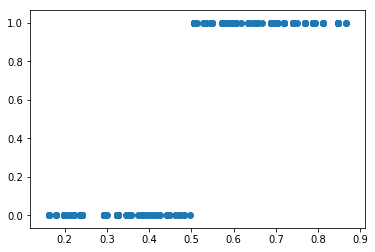

In [18]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

In [19]:
confusion_matrix(y_train.survived, X_train.prediction)

array([[239,  54],
       [ 86, 120]])

In [20]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

df = pd.DataFrame(confusion_matrix(y_train.survived, X_train.prediction),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,239,54
Actual +,86,120


In [21]:
%matplotlib inline
import seaborn as sns

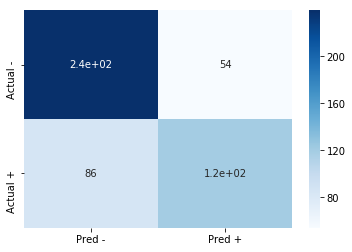

In [22]:
sns.heatmap(df, cmap='Blues', annot=True)

#### Compute Precision, Recall, F1-score, and Support in the "Classification Report" below:

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_train.survived, y_pred))
# See above for Y_pred... its the same as "X_train.prediction"

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       293
           1       0.69      0.58      0.63       206

   micro avg       0.72      0.72      0.72       499
   macro avg       0.71      0.70      0.70       499
weighted avg       0.72      0.72      0.71       499



##### Print and clearly label the following:

##### Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [24]:
tp = df.loc['Actual +', 'Pred +']
fn = df.loc['Actual +', 'Pred -']
fp = df.loc['Actual -', 'Pred +']
tn = df.loc['Actual -', 'Pred -']


accuracy = tp / (tp + fn)
recall = tp / (tp + fn)
fp_rate = fp / (fp + tn)
tn_rate = tn / (fp + tn)
fn_rate = fn / (fn + tp)
precision = tp / (tp + fp)
f1 = (recall + precision) / 2
support = tp + fn

print('accuracy:  %.2f' % accuracy)
print('fpos rt:   %.2f' % fp_rate)
print('recall:    %.2f ie. t_pos rt' % recall)
print('tneg rt:   %.2f' % tn_rate)
print('fneg rt:   %.2f' % fn_rate)
print('precision: %.2f' % precision)
print('f1:        %.2f' % f1)
print('support:   %4d' % support)

accuracy:  0.58
fpos rt:   0.18
recall:    0.58 ie. t_pos rt
tneg rt:   0.82
fneg rt:   0.42
precision: 0.69
f1:        0.64
support:    206


#### Look in the scikit-learn documentation to research the solver parameter.

#### What is your best option(s) for the particular problem you are trying to solve and the data to be used?

###### most likely I would use liblinear.

### Run through steps 2-4 using another solver (from question 5)
### now use a NEW solver:  'saga' ... all items will be renamed to reflect saga or "2"
liblinear is the default, as used above.

In [25]:
# X = df[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']]
# y = df[['survived']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

# X_train.head()

In [26]:
# # Make the thing
# scaler = MinMaxScaler()

# # fit the thing
# scaler.fit(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
# # scaler.fit(train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

# # use the thing
# X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']] = scaler.transform(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
# X_test[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']] = scaler.transform(X_test[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

In [27]:
# X_train.head()

#### Fit the model to the training data

In [28]:
# from sklearn.linear_model import LogisticRegression

# # Make the thing:
# logit2 = LogisticRegression(random_state = 123, solver='saga')
# #logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

# # Fit the thing:
# logit2.fit(X_train, y_train)
# # can list out just x train and y train, or can list out the fields individually, like this:
# # -> "logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)"

#### Print the coefficients and intercept of the model

In [29]:
# print('Columns: \n:', X_train.columns)
# print('Coefficient: \n', logit2.coef_)
# print('Intercept: \n', logit2.intercept_)

#### Estimate whether or not a passenger would survive, using the training data

In [30]:
# # Use the thing:
# y_pred2 = logit2.predict(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
# # logit.predict(X_train)
# y_pred2

#### Estimate the probability of a passenger surviving, using the training data

In [31]:
# y_pred_proba2 = logit2.predict_proba(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])
# print(y_pred_proba2)

### Evaluate Model
#### Compute the accuracy

In [32]:
# X_train['prediction'] = logit2.predict(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

In [33]:
# X_train.head()

#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [34]:
# (y_train.survived == X_train.prediction).sum() / X_train.shape[0]

#### Model Score

In [35]:
# logit2.score(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']], y_train.survived)

In [36]:
# print('Accuracy of Logistic Regression classifier on training set USING SAGA SOLVER PARAMETER: {:.2f}'
#      .format(logit2.score(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']], y_train)))

#### Create a confusion matrix

In [37]:
# y_pred_proba2 = [i[1] for i in y_pred_proba2]
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(y_pred_proba2, y_pred)

In [38]:
# confusion_matrix(y_train.survived, X_train.prediction)

In [39]:
# import pandas as pd

# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# # Thus in binary classification, the count of true negatives is C 0,0,
# # false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

# df = pd.DataFrame(confusion_matrix(y_train.survived, X_train.prediction),
#              columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

# df

In [40]:
# %matplotlib inline
# import seaborn as sns

In [41]:
# sns.heatmap(df, cmap='Blues', annot=True)

#### Compute Precision, Recall, F1-score, and Support in the "Classification Report" below:

In [42]:
# from sklearn.metrics import classification_report

# print(classification_report(y_train.survived, y_pred))
# # See above for Y_pred... its the same as "X_train.prediction"

##### Print and clearly label the following:

##### Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [43]:
# tp = df.loc['Actual +', 'Pred +']
# fn = df.loc['Actual +', 'Pred -']
# fp = df.loc['Actual -', 'Pred +']
# tn = df.loc['Actual -', 'Pred -']


# accuracy = tp / (tp + fn)
# recall = tp / (tp + fn)
# fp_rate = fp / (fp + tn)
# tn_rate = tn / (fp + tn)
# fn_rate = fn / (fn + tp)
# precision = tp / (tp + fp)
# f1 = (recall + precision) / 2
# support = tp + fn

# print('accuracy:  %.2f' % accuracy)
# print('fpos rt:   %.2f' % fp_rate)
# print('recall:    %.2f ie. t_pos rt' % recall)
# print('tneg rt:   %.2f' % tn_rate)
# print('fneg rt:   %.2f' % fn_rate)
# print('precision: %.2f' % precision)
# print('f1:        %.2f' % f1)
# print('support:   %4d' % support)

RESULT:
    The numbers look very similar to those using the liblinear solver parameter.  I can't see much difference.

Numbers from earlier solver using liblinear:

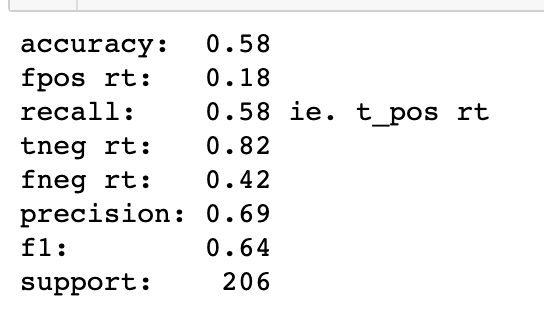

Numbers from earlier solver using saga:

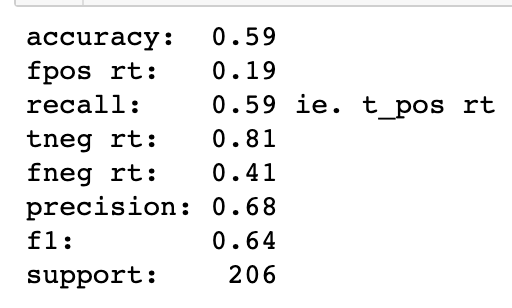

#### Which performs better on your in-sample data?

I would say the saga performs better than log linear.

#### Save the best model in logit_fit

In [45]:
# logit_fit = LogisticRegression(random_state = 123, solver='saga')
# logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

## Now move on to the decision tree, also using the titanic data... then re-do both, using the iris data.

### use multiclass when doing the iris data.

In [81]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import *
from prepare import *

df = prep_iris_data(get_iris_data())
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
0,setosa,5.1,3.5,1.4,0.2,0
1,setosa,4.9,3.0,1.4,0.2,0
2,setosa,4.7,3.2,1.3,0.2,0
3,setosa,4.6,3.1,1.5,0.2,0
4,setosa,5.0,3.6,1.4,0.2,0


In [82]:
df.shape

(150, 6)

In [83]:
df.dropna(inplace=True)

In [84]:
df.shape

(150, 6)

In [85]:
df.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encode'],
      dtype='object')

In [86]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']]
y = df[['species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encode
114,5.8,2.8,5.1,2.4,2
136,6.3,3.4,5.6,2.4,2
53,5.5,2.3,4.0,1.3,1
19,5.1,3.8,1.5,0.3,0
38,4.4,3.0,1.3,0.2,0


In [87]:
# Make the thing
scaler = MinMaxScaler()

# fit the thing
scaler.fit(X_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']])
# scaler.fit(train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

# use the thing
X_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']] = scaler.transform(X_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']])
X_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']] = scaler.transform(X_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']])

In [88]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encode
114,0.424242,0.272727,0.694915,0.958333,1.0
136,0.575758,0.545455,0.779661,0.958333,1.0
53,0.333333,0.045455,0.508475,0.500000,0.5
19,0.212121,0.727273,0.084746,0.083333,0.0
38,0.000000,0.363636,0.050847,0.041667,0.0


### Train Model
#### Create the Decision Tree Object and fit the model to the training data

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# for classification you can change the algorithm as gini or entropy (information gain).  Default is gini.

# make the thing:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

#### Fit the model to the training data

In [91]:
# Fit the thing:
clf.fit(X_train[['petal_length', 'petal_width']], y_train)

# can list out just x train and y train, or can list out the fields individually, like this:
# -> "logit.fit(train[['pclass','age','fare','sibsp','parch']], train.survived)"

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

#### Estimate species

In [92]:
y_pred = clf.predict(X_train[['petal_length', 'petal_width']])
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

#### Estimate the probability of a species

In [93]:
y_pred_proba = clf.predict_proba(X_train[['petal_length', 'petal_width']])
print(y_pred_proba)

[[0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.975 0.025]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.975 0.025]
 [0.    0.975 0.025]
 [0.    0.975 0.025]
 [0.    0.975 0.025]
 [0.    0.    1.   ]
 [0.    0.975 0.025]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.975 0.025]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.975 0.025]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.975 0.025]
 [0.    0.975 0.025]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.975 0.025]
 [0.    0.975 0.025]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.975 0.025]
 [0.    0.975 0.025]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.975 0.025]
 [1.    0.    0.   ]
 [0.    0.5   0.5  ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.   

### Evaluate Model
#### Compute the accuracy

In [94]:
X_train['prediction'] = clf.predict(X_train[['petal_length', 'petal_width']])
# X_train['prediction'] = clf.predict(X_train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode']])

In [95]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encode,prediction
114,0.424242,0.272727,0.694915,0.958333,1.0,virginica
136,0.575758,0.545455,0.779661,0.958333,1.0,virginica
53,0.333333,0.045455,0.508475,0.500000,0.5,versicolor
19,0.212121,0.727273,0.084746,0.083333,0.0,setosa
38,0.000000,0.363636,0.050847,0.041667,0.0,setosa


#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [96]:
(y_train.species == X_train.prediction).sum() / X_train.shape[0]

0.9809523809523809

#### Model Score

In [97]:
clf.score(X_train[['petal_length', 'petal_width']], y_train.species)
#clf.score(X_train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']], y_train.survived)

0.9809523809523809

##### Accuracy: number of correct predictions over the number of total instances that have been evaluated.

In [98]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train[['petal_length', 'petal_width']], y_train.species)))

Accuracy of Decision Tree classifier on training set: 0.98


#### Create a confusion matrix

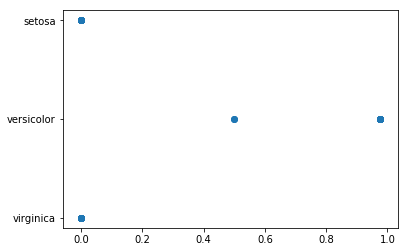

In [99]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

In [100]:
confusion_matrix(y_train.species, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [101]:
sorted(y_train.species.unique())

['setosa', 'versicolor', 'virginica']

In [102]:
y_train.species.value_counts()

versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

In [103]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

labels = sorted(y_train.species.unique())

df = pd.DataFrame(confusion_matrix(y_train.species, X_train.prediction), columns=labels, index=labels)

df

,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,2,31


In [104]:
%matplotlib inline
import seaborn as sns

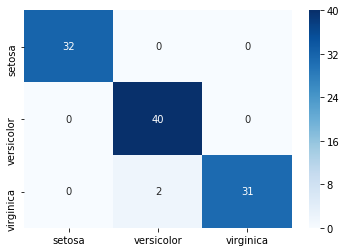

In [105]:
sns.heatmap(df, cmap='Blues', annot=True)

#### Compute Precision, Recall, F1-score, and Support in the "Classification Report" below:

In [106]:
from sklearn.metrics import classification_report

# using "entropy" criterion

print(classification_report(y_train.species, y_pred))
# See above for Y_pred... its the same as "X_train.prediction"

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.98        40
   virginica       1.00      0.94      0.97        33

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [107]:
##### Print and clearly label the following:

##### Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [108]:
# tp = df.loc['Actual +', 'Pred +']
# fn = df.loc['Actual +', 'Pred -']
# fp = df.loc['Actual -', 'Pred +']
# tn = df.loc['Actual -', 'Pred -']


# accuracy = tp / (tp + fn)
# recall = tp / (tp + fn)
# fp_rate = fp / (fp + tn)
# tn_rate = tn / (fp + tn)
# fn_rate = fn / (fn + tp)
# precision = tp / (tp + fp)
# f1 = (recall + precision) / 2
# support = tp + fn

# print('accuracy:  %.2f' % accuracy)
# print('fpos rt:   %.2f' % fp_rate)
# print('recall:    %.2f ie. t_pos rt' % recall)
# print('tneg rt:   %.2f' % tn_rate)
# print('fneg rt:   %.2f' % fn_rate)
# print('precision: %.2f' % precision)
# print('f1:        %.2f' % f1)
# print('support:   %4d' % support)

### Test Model
#### Compute the accuracy of the model when run on the test data

#### Model Score

In [109]:
clf.score(X_test[['petal_length', 'petal_width']], y_test.species)

0.9333333333333333

##### Accuracy: number of correct predictions over the number of total instances that have been evaluated.

In [110]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_test[['petal_length', 'petal_width']], y_test.species)))

Accuracy of Decision Tree classifier on training set: 0.93


In [43]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

from graphviz import Graph

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

graph.render('iris_decision_tree2', view=True)

'iris_decision_tree2.pdf'

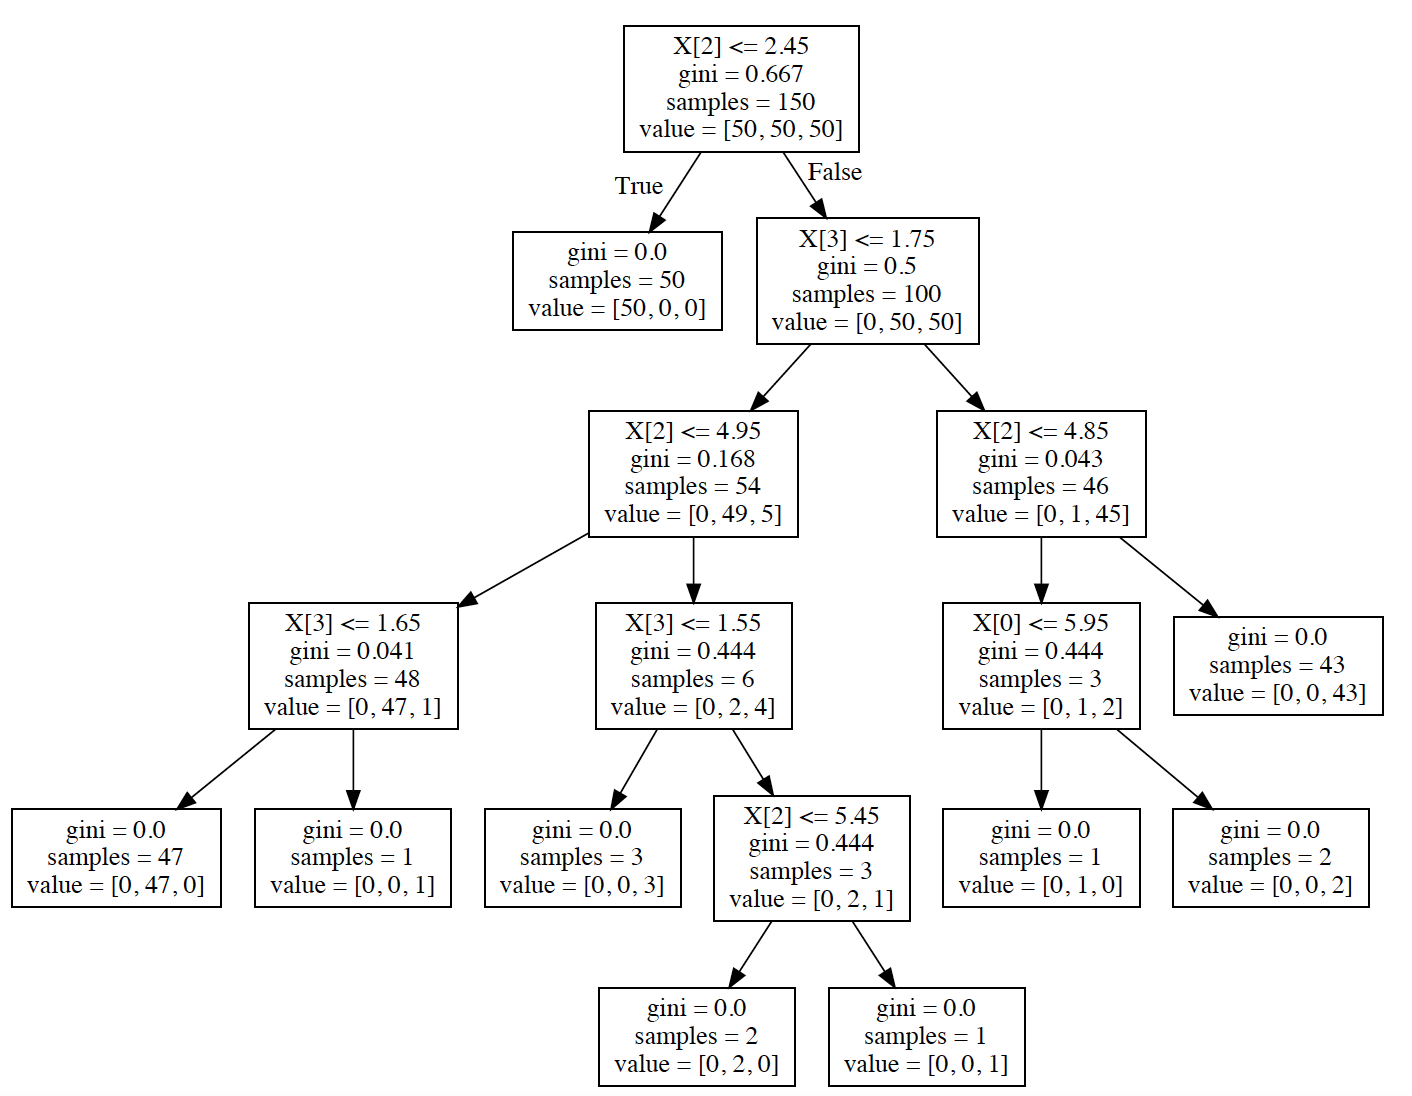


### Results from using 'gini' criterion produce identical numbers to the entropy criterion, shown below.  This may be due to the small data set.

### Results using entropy criterion

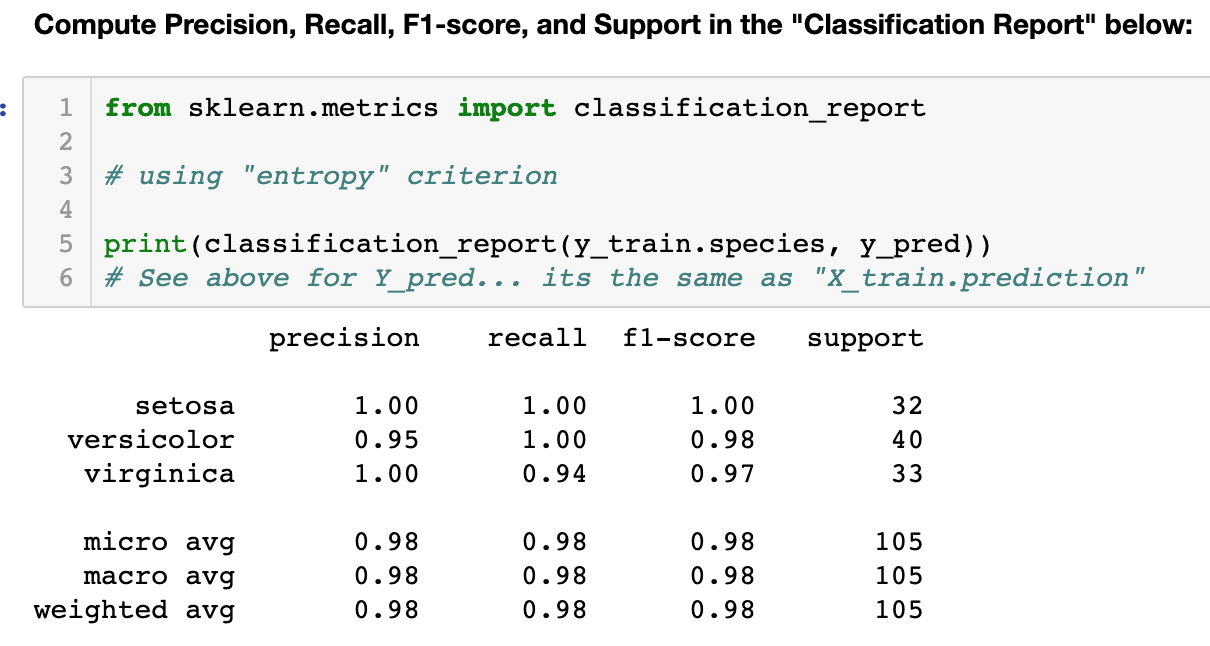

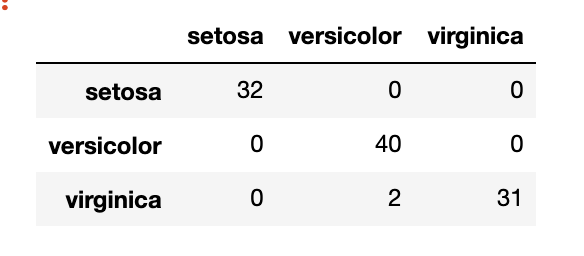

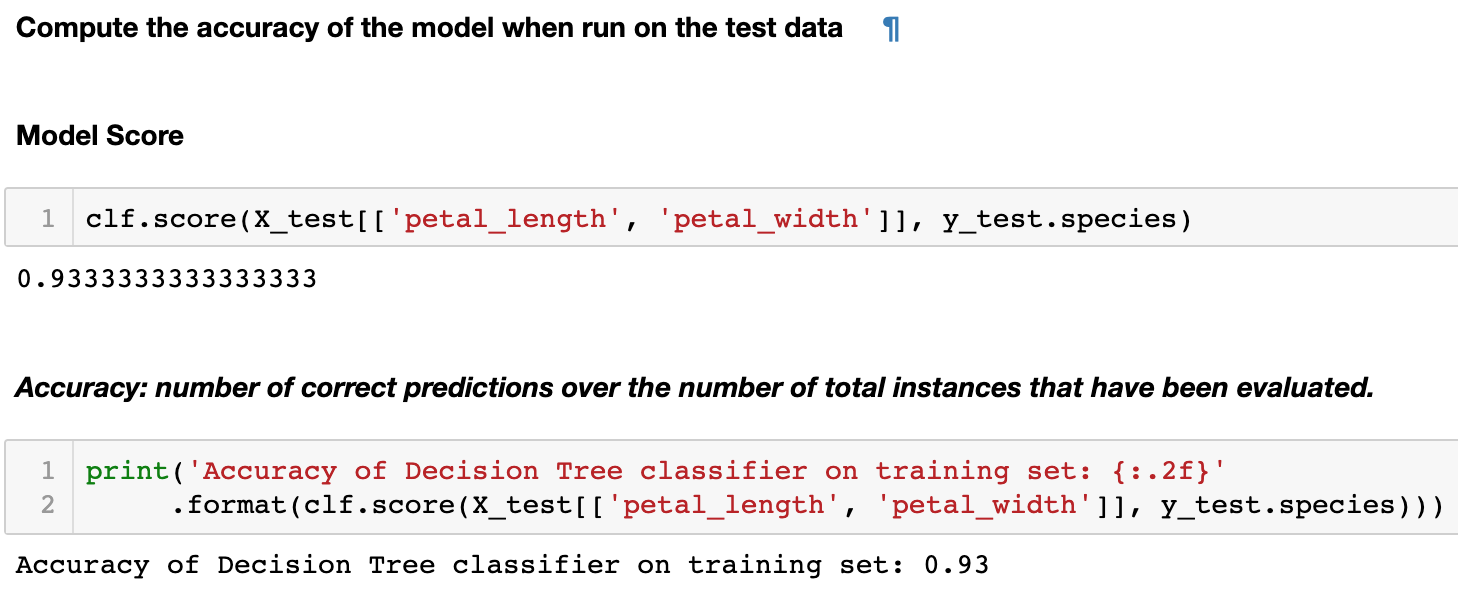

#### Which performs better on your in-sample data?

Results from using 'gini' criterion produce identical numbers to the entropy criterion, shown below.  This may be due to the small data set.  I see no difference between the two.

#### Save the best model in tree_fit

In [ ]:
# for classification you can change the algorithm as gini or entropy (information gain).  Default is gini.

# make the thing:
# tree_fit = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

### Random Forest

In [3]:
from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

passenger_id       0
survived           0
pclass             0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
class              0
embark_town        0
alone              0
embarked_encode    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [7]:
df.shape

(714, 13)

In [21]:
X = df.drop(['survived'], axis=1)
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train = X_train[['pclass', 'age', 'fare', 'sibsp', 'parch']]
X_test = X_test[['pclass', 'age', 'fare', 'sibsp', 'parch']]

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [22]:
X_train.shape

(499, 5)

In [23]:
X_test.shape

(215, 5)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [26]:
rf.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [27]:
print(rf.feature_importances_)

[0.32480013 0.13752631 0.37630011 0.07262912 0.08874434]


In [32]:
y_pred = rf.predict(X_train)
y_pred[0:10]

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [29]:
y_pred_proba = rf.predict_proba(X_train)

In [33]:
y_pred_proba[0:10]

array([[0.80011203, 0.19988797],
       [0.44666637, 0.55333363],
       [0.81476779, 0.18523221],
       [0.27959219, 0.72040781],
       [0.62590135, 0.37409865],
       [0.80076013, 0.19923987],
       [0.80293215, 0.19706785],
       [0.29343826, 0.70656174],
       [0.48654958, 0.51345042],
       [0.43484357, 0.56515643]])

In [35]:
rf.score(X_train, y_train)

0.751503006012024

In [34]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [36]:
confusion_matrix(y_train, y_pred)

array([[248,  45],
       [ 79, 127]])

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       293
           1       0.74      0.62      0.67       206

   micro avg       0.75      0.75      0.75       499
   macro avg       0.75      0.73      0.74       499
weighted avg       0.75      0.75      0.75       499



In [38]:
rf.score(X_test, y_test)

0.7441860465116279

In [39]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.74


### KNN -- K-Nearest Neighbors
Using titanic data

In [150]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler

from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [151]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       891 non-null int64
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                714 non-null float64
sibsp              891 non-null int64
parch              891 non-null int64
fare               891 non-null float64
embarked           891 non-null object
class              891 non-null object
embark_town        891 non-null object
alone              891 non-null int64
embarked_encode    891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


(891, 13)

In [152]:
df.dropna(inplace=True)

In [153]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       714 non-null int64
survived           714 non-null int64
pclass             714 non-null int64
sex                714 non-null object
age                714 non-null float64
sibsp              714 non-null int64
parch              714 non-null int64
fare               714 non-null float64
embarked           714 non-null object
class              714 non-null object
embark_town        714 non-null object
alone              714 non-null int64
embarked_encode    714 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 78.1+ KB


(714, 13)

In [154]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

In [155]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,sibsp,parch,fare
60,3,22.0,0,0,7.2292
348,3,3.0,1,1,15.9000
606,3,30.0,0,0,7.8958
195,1,58.0,0,0,146.5208
56,2,21.0,0,0,10.5000


### Train Model
##### Create KNN Object

In [156]:
# make the thing:

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit the K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

##### Fit the model to the training data

In [157]:
# fit the thing

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

##### Estimate whether or not a passenger would survive, using the training data

In [158]:
# use the thing

y_pred = knn.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### Estimate the probability of a passenger surviving, using the training data

In [159]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8,

### Evaluate your results using the model score, confusion matrix, and classification report.

### Evaluate Model

#### Compute the accuracy

In [160]:
pickle = knn.score(X_train,y_train)
pickle

0.7615230460921844

In [161]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.76


#### Create a confusion matrix

In [162]:
print(confusion_matrix(y_train, y_pred))

[[239  54]
 [ 65 141]]


#### Compute Precision, Recall, F1-score, and Support

In [163]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       293
           1       0.72      0.68      0.70       206

   micro avg       0.76      0.76      0.76       499
   macro avg       0.75      0.75      0.75       499
weighted avg       0.76      0.76      0.76       499



In [164]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

df = pd.DataFrame(confusion_matrix(y_train.survived, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,239,54
Actual +,65,141


In [165]:
%matplotlib inline
import seaborn as sns

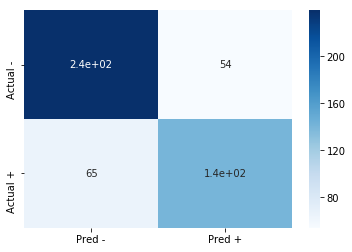

In [166]:
sns.heatmap(df, cmap='Blues', annot=True)

#### Compute Precision, Recall, F1-score, and Support in the "Classification Report" below:

##### Print and clearly label the following:

##### Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [167]:
tp = df.loc['Actual +', 'Pred +']
fn = df.loc['Actual +', 'Pred -']
fp = df.loc['Actual -', 'Pred +']
tn = df.loc['Actual -', 'Pred -']


accuracy = tp / (tp + fn)
recall = tp / (tp + fn)
fp_rate = fp / (fp + tn)
tn_rate = tn / (fp + tn)
fn_rate = fn / (fn + tp)
precision = tp / (tp + fp)
f1 = (recall + precision) / 2
support = tp + fn

print('accuracy:  %.2f' % accuracy)
print('fpos rt:   %.2f' % fp_rate)
print('recall:    %.2f ie. t_pos rt' % recall)
print('tneg rt:   %.2f' % tn_rate)
print('fneg rt:   %.2f' % fn_rate)
print('precision: %.2f' % precision)
print('f1:        %.2f' % f1)
print('support:   %4d' % support)

accuracy:  0.68
fpos rt:   0.18
recall:    0.68 ie. t_pos rt
tneg rt:   0.82
fneg rt:   0.32
precision: 0.72
f1:        0.70
support:    206


### Test Model

#### Compute the accuracy of the model when run on the test data:
#### K set to 5 neighbors

In [168]:
monkey = knn.score(X_test,y_test)
monkey

0.6651162790697674

In [169]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.67


### K set to 5

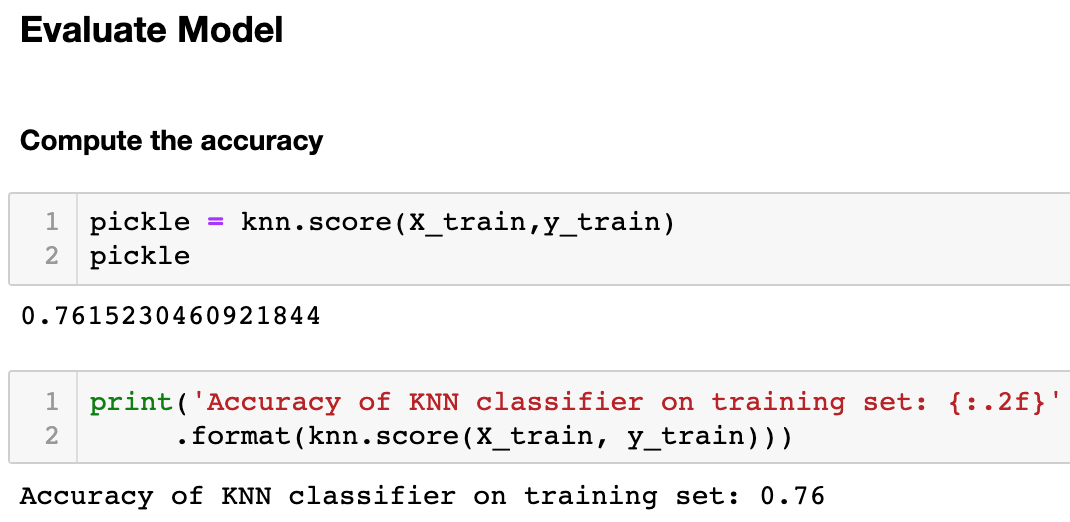

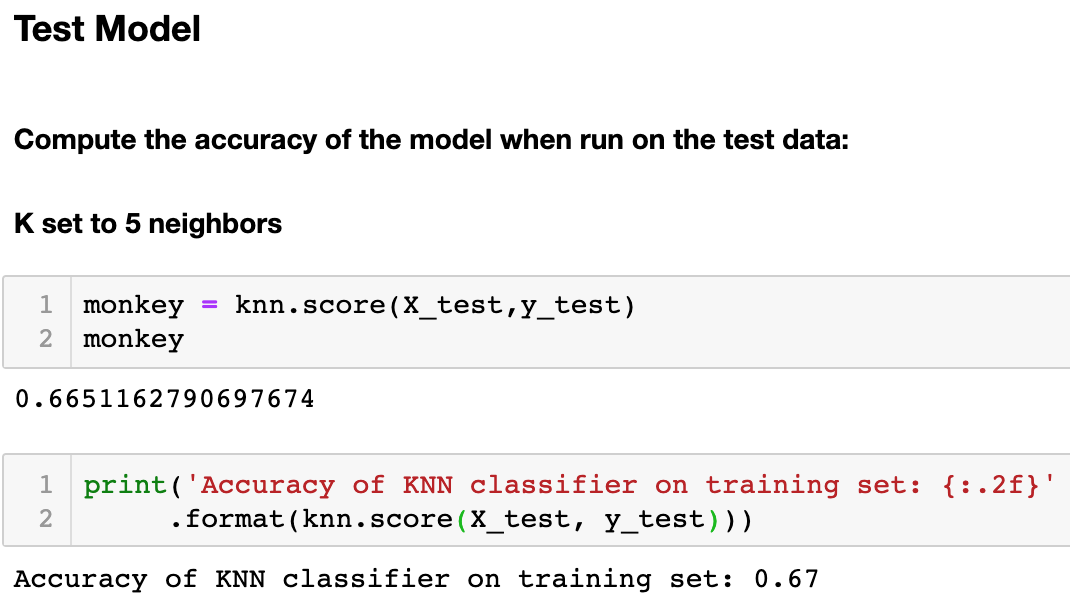

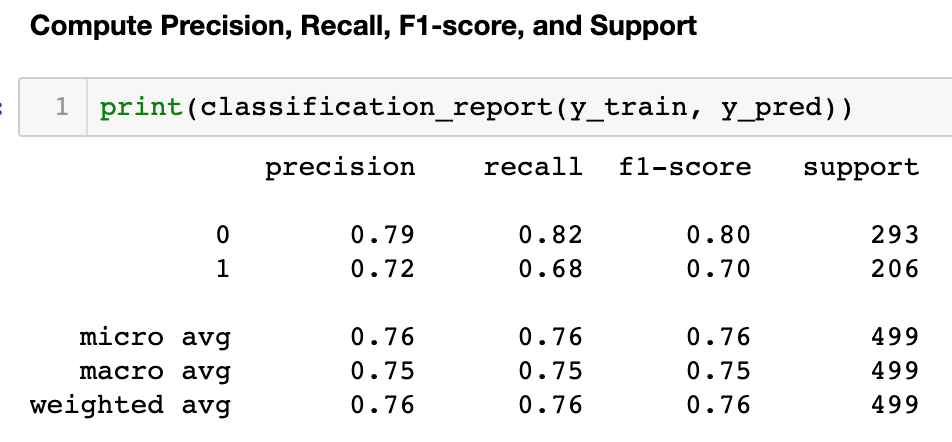

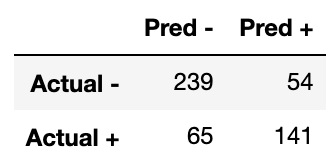

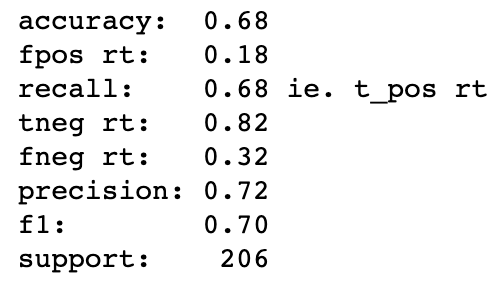

### Run through steps 2-4 setting k to 10

### K set to 10

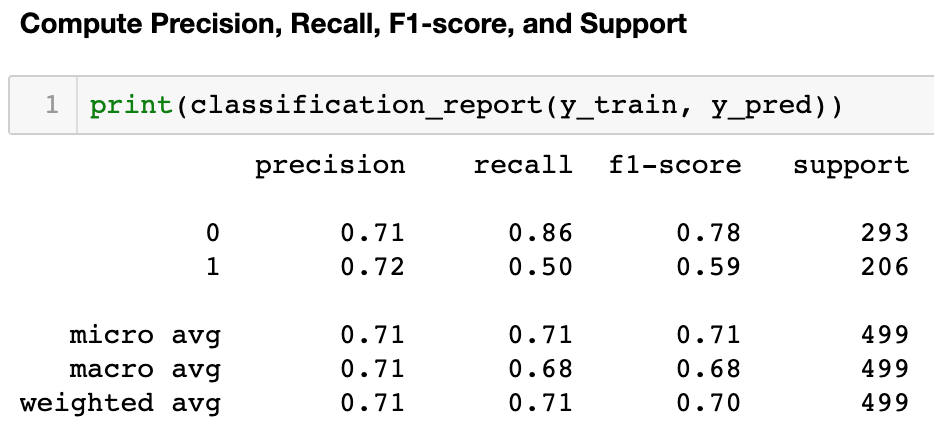

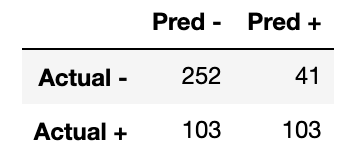

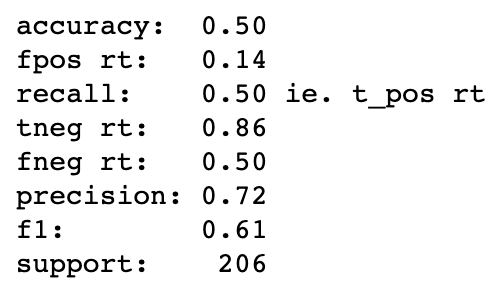

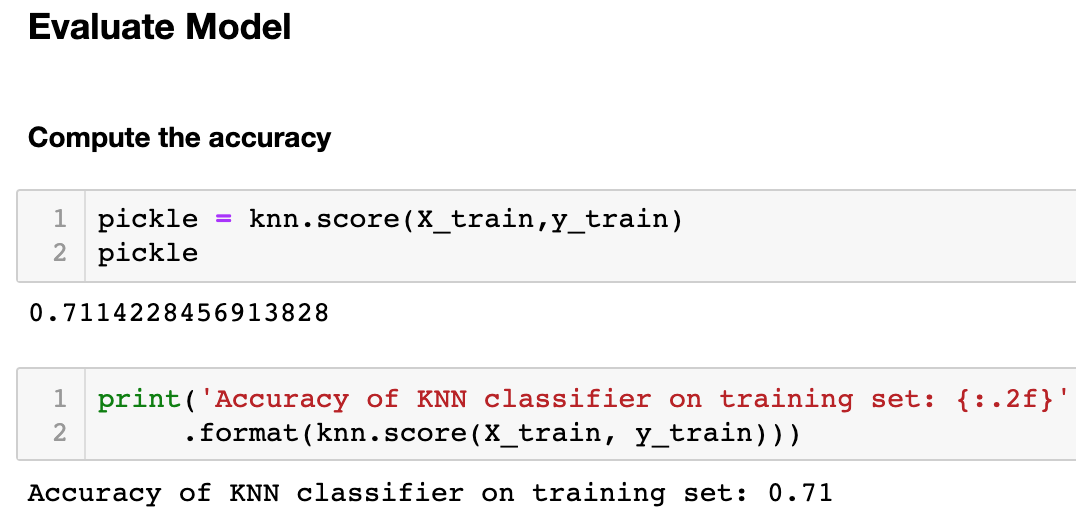

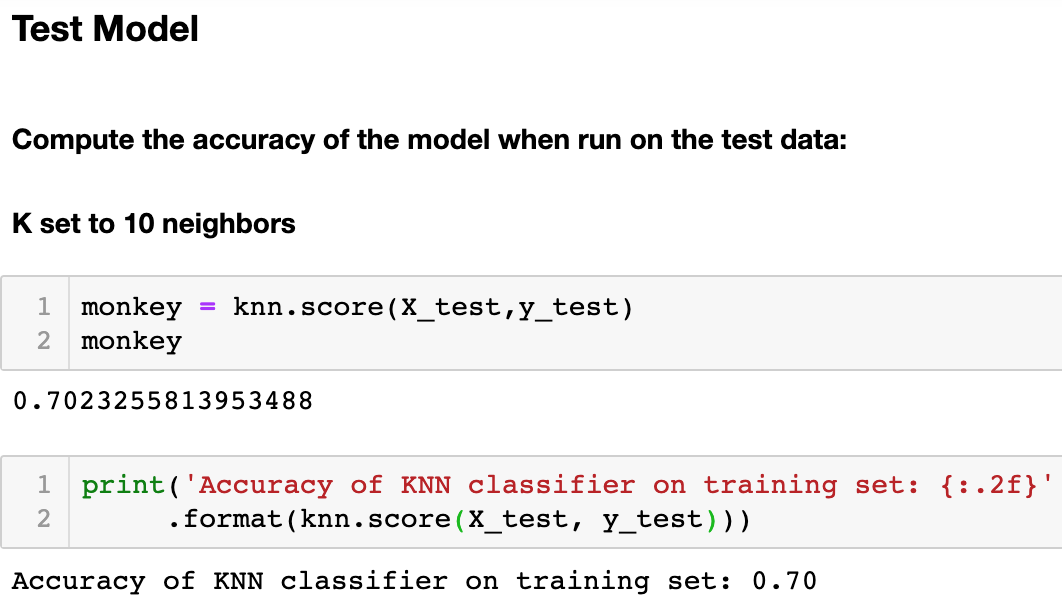

### Run through setps 2-4 setting k to 20

### K set to 20

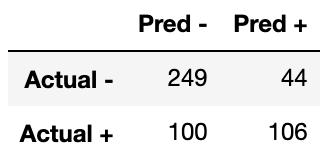

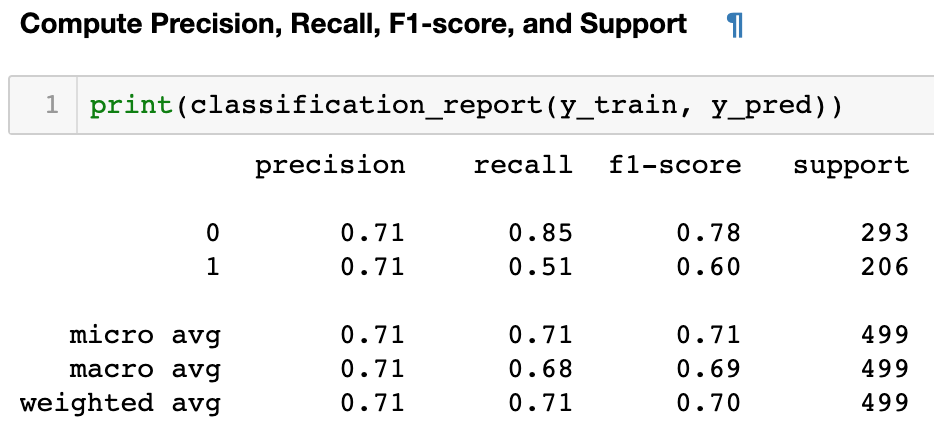

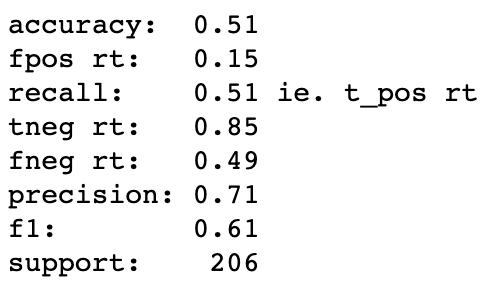

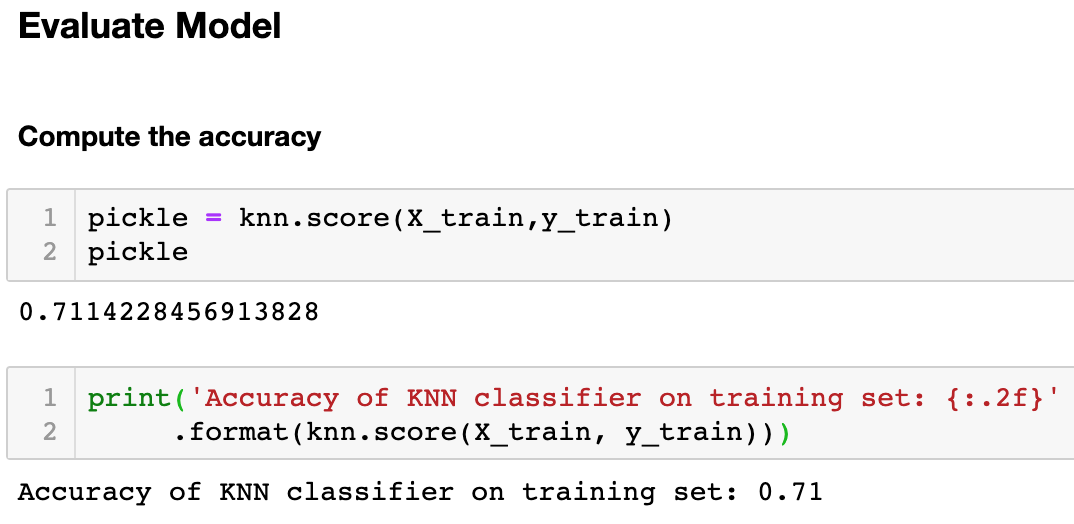

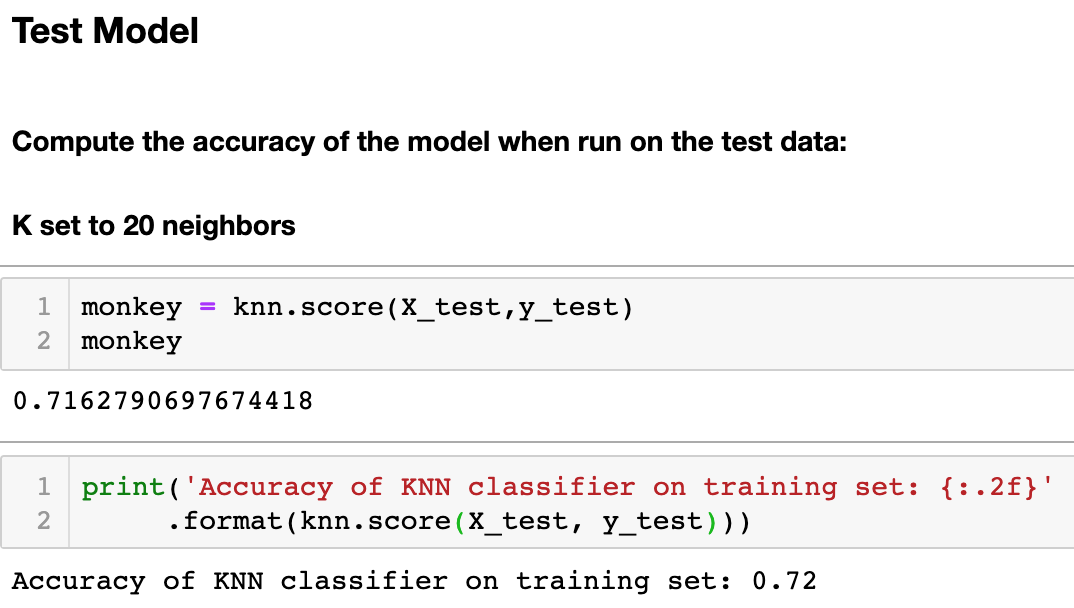

### Visualize Model

([<matplotlib.axis.XTick at 0x1a257492b0>,
 <a list of 5 Text xticklabel objects>)

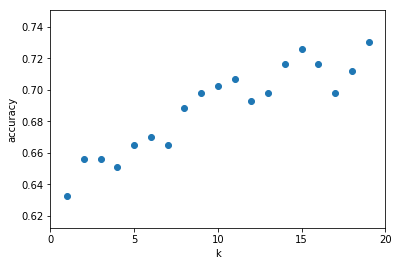

In [176]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

#### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The K-neighbor set to 5 appears to generate the best results in the train and test data.

#### Save the best model in knn_fit

In [ ]:
# make the thing:

# knn.fit = KNeighborsClassifier(n_neighbors=5, weights='uniform')

### Random Forest
Using titanic data

In [177]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [178]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       891 non-null int64
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                714 non-null float64
sibsp              891 non-null int64
parch              891 non-null int64
fare               891 non-null float64
embarked           891 non-null object
class              891 non-null object
embark_town        891 non-null object
alone              891 non-null int64
embarked_encode    891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


(891, 13)

In [179]:
df.dropna(inplace=True)

In [180]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       714 non-null int64
survived           714 non-null int64
pclass             714 non-null int64
sex                714 non-null object
age                714 non-null float64
sibsp              714 non-null int64
parch              714 non-null int64
fare               714 non-null float64
embarked           714 non-null object
class              714 non-null object
embark_town        714 non-null object
alone              714 non-null int64
embarked_encode    714 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 78.1+ KB


(714, 13)

In [181]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

In [155]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,sibsp,parch,fare
60,3,22.0,0,0,7.2292
348,3,3.0,1,1,15.9000
606,3,30.0,0,0,7.8958
195,1,58.0,0,0,146.5208
56,2,21.0,0,0,10.5000


In [182]:
# Make the thing
scaler = MinMaxScaler()

# fit the thing
scaler.fit(X_train[['pclass', 'age', 'sibsp', 'parch', 'fare']])
# scaler.fit(train[['pclass', 'alone', 'sibsp', 'parch', 'embarked_encode']])

# use the thing
X_train[['pclass', 'age', 'sibsp', 'parch', 'fare']] = scaler.transform(X_train[['pclass', 'age', 'sibsp', 'parch', 'fare']])
X_test[['pclass', 'age', 'sibsp', 'parch', 'fare']] = scaler.transform(X_test[['pclass', 'age', 'sibsp', 'parch', 'fare']])

In [186]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 651 to 244
Data columns (total 5 columns):
pclass    215 non-null float64
age       215 non-null float64
sibsp     215 non-null float64
parch     215 non-null float64
fare      215 non-null float64
dtypes: float64(5)
memory usage: 10.1 KB


### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.

### Train Model
##### Create Random Forest Object

In [188]:
# make the thing
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None,
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3,
                            random_state=123)

#### Fit the model to the training data

In [190]:
# fit the thing
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

#### Print Feature Importances

In [192]:
print(rf.feature_importances_)

[0.32482242 0.15274822 0.07428407 0.08624305 0.36190224]


In [ ]:
# use the thing

#### Estimate whether or not a passenger would survive, using the training data

In [195]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

#### Estimate the probability of a passenger surviving, using the training data

In [197]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.79662927, 0.20337073],
       [0.4249972 , 0.5750028 ],
       [0.80960727, 0.19039273],
       [0.32385524, 0.67614476],
       [0.62355499, 0.37644501],
       [0.79384435, 0.20615565],
       [0.79561602, 0.20438398],
       [0.30325961, 0.69674039],
       [0.47428323, 0.52571677],
       [0.43919098, 0.56080902],
       [0.46411753, 0.53588247],
       [0.79024712, 0.20975288],
       [0.28337602, 0.71662398],
       [0.68343619, 0.31656381],
       [0.43461239, 0.56538761],
       [0.7433023 , 0.2566977 ],
       [0.58772291, 0.41227709],
       [0.79442324, 0.20557676],
       [0.80074962, 0.19925038],
       [0.20370642, 0.79629358],
       [0.51199597, 0.48800403],
       [0.60537959, 0.39462041],
       [0.54523955, 0.45476045],
       [0.79918921, 0.20081079],
       [0.80091926, 0.19908074],
       [0.79367544, 0.20632456],
       [0.60673902, 0.39326098],
       [0.32437555, 0.67562445],
       [0.25458556, 0.74541444],
       [0.80853154, 0.19146846],
       [0.

### Evaluate Model

#### Evaluate your results using the model score, confusion matrix, and classification report.

#### Compute the accuracy

In [198]:
donkey = rf.score(X_train,y_train)
donkey

0.749498997995992

In [202]:
print('Accuracy of Random Forest on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of Random Forest on training set: 0.75


#### Create a confusion matrix

In [200]:
print(confusion_matrix(y_train, y_pred))

[[247  46]
 [ 79 127]]


#### Create a Classification Report to compute Precision, Recall, F1-score, and Support

In [201]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       293
           1       0.73      0.62      0.67       206

   micro avg       0.75      0.75      0.75       499
   macro avg       0.75      0.73      0.73       499
weighted avg       0.75      0.75      0.75       499



In [204]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

df = pd.DataFrame(confusion_matrix(y_train, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

df

,Pred -,Pred +
Actual -,247,46
Actual +,79,127


In [165]:
%matplotlib inline
import seaborn as sns

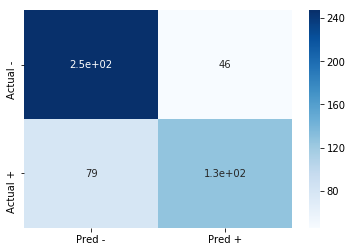

In [205]:
sns.heatmap(df, cmap='Blues', annot=True)

##### Print and clearly label the following:

##### Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [206]:
tp = df.loc['Actual +', 'Pred +']
fn = df.loc['Actual +', 'Pred -']
fp = df.loc['Actual -', 'Pred +']
tn = df.loc['Actual -', 'Pred -']


accuracy = tp / (tp + fn)
recall = tp / (tp + fn)
fp_rate = fp / (fp + tn)
tn_rate = tn / (fp + tn)
fn_rate = fn / (fn + tp)
precision = tp / (tp + fp)
f1 = (recall + precision) / 2
support = tp + fn

print('accuracy:  %.2f' % accuracy)
print('fpos rt:   %.2f' % fp_rate)
print('recall:    %.2f ie. t_pos rt' % recall)
print('tneg rt:   %.2f' % tn_rate)
print('fneg rt:   %.2f' % fn_rate)
print('precision: %.2f' % precision)
print('f1:        %.2f' % f1)
print('support:   %4d' % support)

accuracy:  0.62
fpos rt:   0.16
recall:    0.62 ie. t_pos rt
tneg rt:   0.84
fneg rt:   0.38
precision: 0.73
f1:        0.68
support:    206


### Test Model

#### Compute the accuracy of the model when run on the test data:
#### Min_samples_leaf set to 3

In [207]:
leaf_3 = rf.score(X_test,y_test)
leaf_3

0.7395348837209302

In [209]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.74


### min_samples_leaf = 3

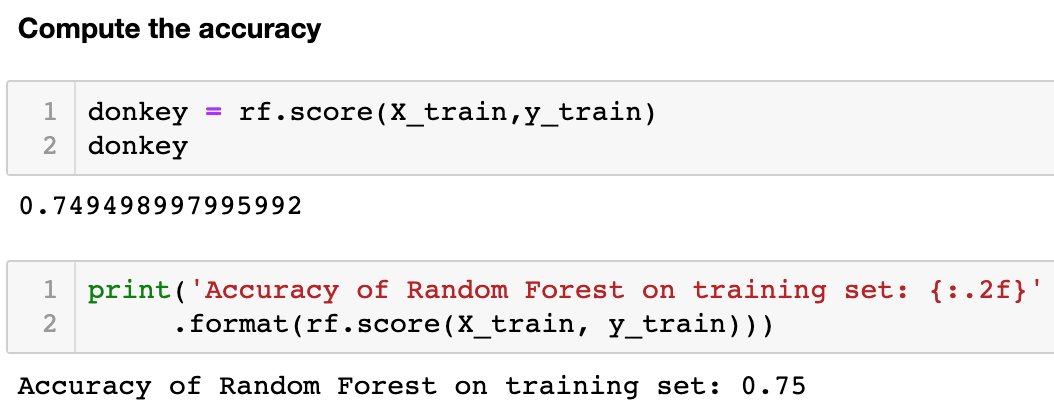

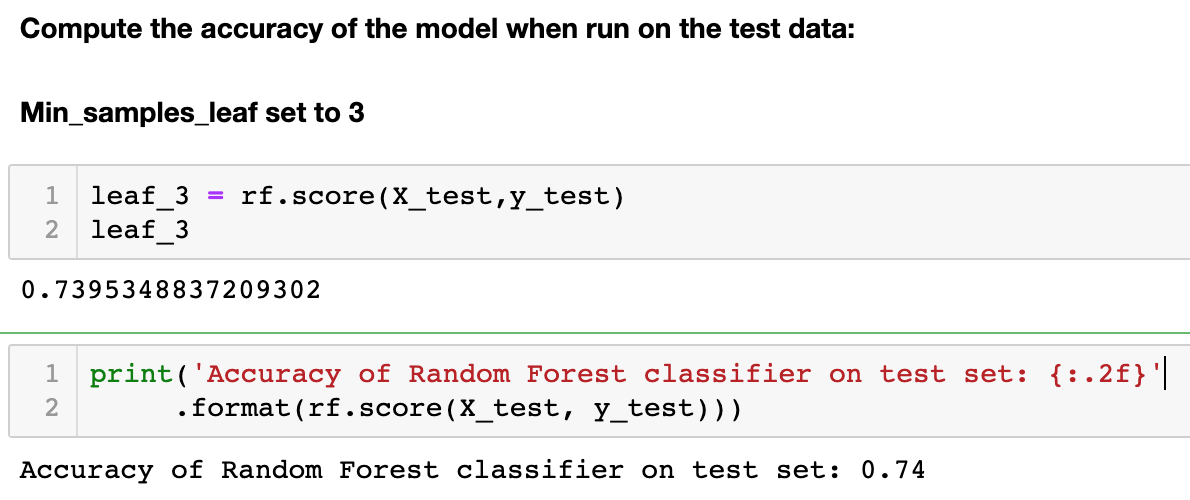

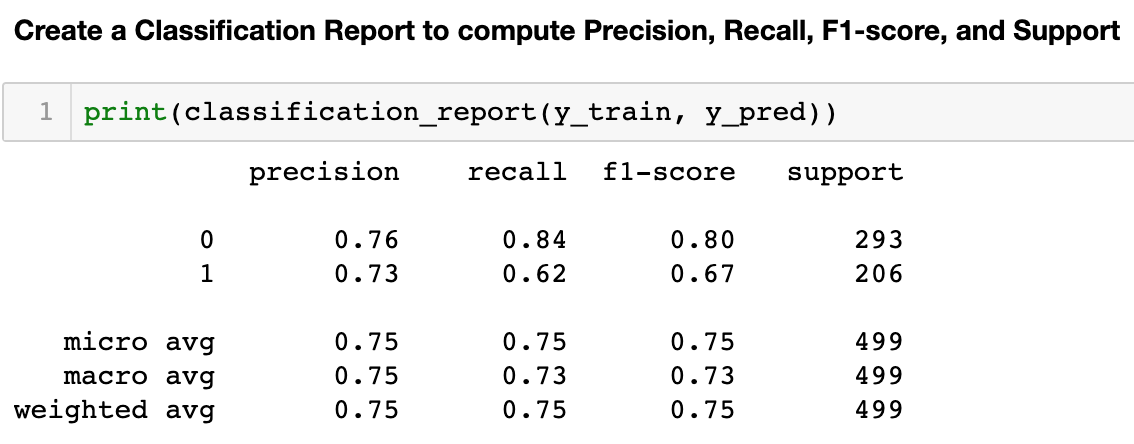

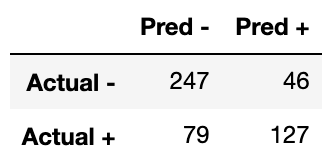

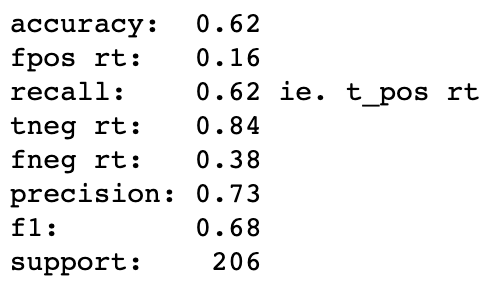

#### Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.

#### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### Save the best model in forest_fit